In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta
from functools import reduce
import warnings
warnings.filterwarnings('ignore')

### Компании S&P 500

In [2]:
# Исторические цены компаний, которые входят в текущий состав индекса S&P 500

In [3]:
df = pd.read_csv('comp_s&p_500.csv', low_memory=False)
df.head()

,2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1000,Unnamed: 1001,Unnamed: 1002,Unnamed: 1003,Unnamed: 1004,Unnamed: 1005,Unnamed: 1006,Unnamed: 1007,Unnamed: 1008,Unnamed: 1009
0,NaN,MMM,NaN,ABT,NaN,ABBV,NaN,ABMD,NaN,ACN,...,NaN,YUM,NaN,ZBRA,NaN,ZBH,NaN,ZION,NaN,ZTS
1,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,...,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close
2,01.11.2011 16:00:00,"76,53",01.11.2011 16:00:00,"25,24",10.12.2012 16:00:00,35,01.11.2011 16:00:00,"14,33",01.11.2011 16:00:00,"57,46",...,01.11.2011 16:00:00,"37,84",01.11.2011 16:00:00,"33,97",01.11.2011 16:00:00,"50,81",01.11.2011 16:00:00,"16,67",01.02.2013 16:00:00,"31,01"
3,02.11.2011 16:00:00,"78,06",02.11.2011 16:00:00,"25,3",11.12.2012 16:00:00,"35,32",02.11.2011 16:00:00,"14,51",02.11.2011 16:00:00,"58,48",...,02.11.2011 16:00:00,"38,22",02.11.2011 16:00:00,"35,4",02.11.2011 16:00:00,"51,84",02.11.2011 16:00:00,"17,05",04.02.2013 16:00:00,"31,02"
4,03.11.2011 16:00:00,"79,64",03.11.2011 16:00:00,"25,76",12.12.2012 16:00:00,"33,36",03.11.2011 16:00:00,"17,77",03.11.2011 16:00:00,"59,22",...,03.11.2011 16:00:00,"38,86",03.11.2011 16:00:00,"36,2",03.11.2011 16:00:00,"52,69",03.11.2011 16:00:00,"17,41",05.02.2013 16:00:00,"31,04"


In [4]:
# Изменит тип столбцов с датами на datetime
for i in range(0, 1010, 2):
    df.iloc[2:, i] = pd.to_datetime(df.iloc[2:, i], dayfirst=True)
df.head()

,2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1000,Unnamed: 1001,Unnamed: 1002,Unnamed: 1003,Unnamed: 1004,Unnamed: 1005,Unnamed: 1006,Unnamed: 1007,Unnamed: 1008,Unnamed: 1009
0,NaN,MMM,NaN,ABT,NaN,ABBV,NaN,ABMD,NaN,ACN,...,NaN,YUM,NaN,ZBRA,NaN,ZBH,NaN,ZION,NaN,ZTS
1,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close,...,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close
2,2011-11-01 16:00:00,"76,53",2011-11-01 16:00:00,"25,24",2012-12-10 16:00:00,35,2011-11-01 16:00:00,"14,33",2011-11-01 16:00:00,"57,46",...,2011-11-01 16:00:00,"37,84",2011-11-01 16:00:00,"33,97",2011-11-01 16:00:00,"50,81",2011-11-01 16:00:00,"16,67",2013-02-01 16:00:00,"31,01"
3,2011-11-02 16:00:00,"78,06",2011-11-02 16:00:00,"25,3",2012-12-11 16:00:00,"35,32",2011-11-02 16:00:00,"14,51",2011-11-02 16:00:00,"58,48",...,2011-11-02 16:00:00,"38,22",2011-11-02 16:00:00,"35,4",2011-11-02 16:00:00,"51,84",2011-11-02 16:00:00,"17,05",2013-02-04 16:00:00,"31,02"
4,2011-11-03 16:00:00,"79,64",2011-11-03 16:00:00,"25,76",2012-12-12 16:00:00,"33,36",2011-11-03 16:00:00,"17,77",2011-11-03 16:00:00,"59,22",...,2011-11-03 16:00:00,"38,86",2011-11-03 16:00:00,"36,2",2011-11-03 16:00:00,"52,69",2011-11-03 16:00:00,"17,41",2013-02-05 16:00:00,"31,04"


In [5]:
df.iloc[:,:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   2           2517 non-null   object
 1   Unnamed: 1  2518 non-null   object
 2   Unnamed: 2  2517 non-null   object
 3   Unnamed: 3  2518 non-null   object
 4   Unnamed: 4  2240 non-null   object
dtypes: object(5)
memory usage: 98.5+ KB


In [6]:
# Мержим данные по дате, приводим к удобному виду

df_all = pd.DataFrame(df.iloc[2:, 0])
df_all.index = range(len(df_all))
df_all.rename(columns={"2": "date"}, inplace=True)

for i in range(0, 1010, 2):
    df_all = df_all.merge(df.iloc[:, [i, i+1]], how='left', left_on='date', right_on=df.columns[i])
    df_all.drop(df_all.columns[int((i+2)/2)], axis=1, inplace=True)
    df_all.rename(columns={df_all.columns[int((i+2)/2)]: df.iloc[0, i+1]}, inplace=True)
    
df_all.head()

,date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2011-11-01 16:00:00,"76,53","25,24",NaN,"14,33","57,46","13,25","28,59","5,3","64,82",...,"95,5","128,61","25,21","32,52","27,31","37,84","33,97","50,81","16,67",NaN
1,2011-11-02 16:00:00,"78,06","25,3",NaN,"14,51","58,48","13,29","29,35","5,46","64,9",...,"96,77","132,54","25,83","31,81","26,62","38,22","35,4","51,84","17,05",NaN
2,2011-11-03 16:00:00,"79,64","25,76",NaN,"17,77","59,22","13,38","30,16","5,73","66,07",...,"96,08","133,69","26,2","32,42","26,39","38,86","36,2","52,69","17,41",NaN
3,2011-11-04 16:00:00,"79,3","25,52",NaN,"18,73","58,24","13,56","29,79","5,67","66,02",...,"95,68","131,65","26,06","32,85","25,19","38,81","36,31","51,3","17,06",NaN
4,2011-11-07 16:00:00,"79,69","25,66",NaN,"18,74",58,"13,74","29,92","5,68","66,45",...,"95,63","128,72","26,19","32,97","24,6","39,28","36,53","52,86","17,18",NaN


In [7]:
# Оставляем только месячные данные, переводим в float

a = list(df_all['date'].apply(lambda x: x.month))
b = [i for i in range(len(a))[:-1] if a[i]!=a[i+1]]
b.append(len(a)-1)
df1 = df_all.iloc[b] 
df1.index = range(len(df1))

In [8]:
for i in range(len(df1.columns))[1:]:
    df1.iloc[:,i] = df1.iloc[:,i].apply(lambda x: float(str(x).replace(',','.')))

In [9]:
df1.head()

,date,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2011-11-30 16:00:00,81.04,26.10,NaN,20.14,57.93,12.42,27.42,5.69,69.22,...,93.40,120.56,26.29,32.71,23.90,40.30,37.86,50.55,16.09,NaN
1,2011-12-30 16:00:00,81.73,26.90,NaN,18.47,53.23,12.32,28.27,5.40,69.63,...,102.78,110.49,27.64,32.06,25.69,42.43,35.78,53.42,16.28,NaN
2,2012-01-31 16:00:00,86.71,25.91,NaN,18.50,57.34,12.34,30.95,6.71,76.64,...,102.97,115.23,26.60,35.85,25.91,45.54,37.84,60.75,16.83,NaN
3,2012-02-29 16:00:00,87.60,27.09,NaN,20.88,59.54,11.95,32.89,7.35,85.37,...,95.05,118.54,26.49,36.93,25.98,47.63,38.44,60.75,19.00,NaN
4,2012-03-30 16:00:00,89.21,29.33,NaN,22.19,64.50,12.82,34.31,8.02,88.57,...,92.66,124.88,26.47,36.48,27.75,51.18,41.18,64.28,21.46,NaN


In [10]:
# Для каждого квартала начиная с Q1 2013 для каждой компании считаем доходность за предыдущие 12 месяцев (dfry), 
# и доходность за этот квартал (dfrq)

r_y = []
r_q = []
for i in range(13,117,3):
    r_y.append(df1.iloc[i, 1:].values/df1.iloc[i-12, 1:].values-1)
    r_q.append(df1.iloc[i+3, 1:].values/df1.iloc[i, 1:].values-1)

dfry = pd.DataFrame(r_y)
dfry.columns = df1.columns[1:]
dfrq = pd.DataFrame(r_q)
dfrq.columns = df1.columns[1:]

In [11]:
dfry.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,0.136058,0.165056,NaN,-0.272334,0.249296,-0.137987,0.332862,-0.555556,0.039064,-0.096284,...,-0.135824,0.018101,-0.033647,0.118528,0.054885,0.125383,0.098658,0.247847,0.314496,NaN
1,0.191683,0.204228,NaN,-0.158630,0.177829,0.136505,0.268435,-0.682045,-0.066840,-0.038256,...,0.128966,0.002242,0.122025,0.046327,-0.006847,0.010746,0.144488,0.170193,0.164492,NaN
2,0.220424,0.130632,NaN,-0.055215,0.197537,0.189324,0.407476,-0.287958,0.189827,-0.065472,...,0.117629,0.233803,-0.002464,0.179923,0.070322,0.076425,0.264261,0.164388,0.489186,NaN
3,0.292036,0.011890,NaN,-0.091949,0.051549,0.478723,0.601110,0.130564,0.208065,0.211486,...,0.173620,0.368763,-0.003609,0.402275,0.110537,0.076101,0.215257,0.214729,0.327202,NaN
4,0.510501,0.223038,0.54596,0.989583,0.236391,0.678908,0.589172,0.612500,0.529786,0.356075,...,0.336411,0.726465,0.046050,0.280535,0.276753,0.138639,0.375731,0.397990,0.400000,NaN


In [12]:
# 100 компаний с самой высокой доходностью за предыдущий год для каждого квартала

ind_list = []
for i in range(len(dfry)):
    clear = [x for x in dfry.iloc[i].values if str(x) != 'nan']
    clear.sort()
    top = clear[-100:]
    ind = [list(dfry.iloc[i].values).index(top[j]) for j in range(len(top))]
    ind_list.append(ind)

In [13]:
# Средний доход (тк покупаем поровну) за каждый квартал 100 компаний с самой высокой доходностью за предыдущий год

compr = [dfrq.iloc[i,ind_list[i]].values.mean() for i in range(len(ind_list))]
compr1 = np.array(compr) + 1

### Индекс S&P 500

In [14]:
dfsp = pd.read_csv('sp500_ind.csv')
dfsp.head()

,Unnamed: 0,INDEXSP:.INX
0,Date,Close
1,01.11.2011 16:00:00,"1218,28"
2,02.11.2011 16:00:00,"1237,9"
3,03.11.2011 16:00:00,"1261,15"
4,04.11.2011 16:00:00,"1253,23"


In [15]:
# Приводим данные к нужному типу и мержим по дате с компаниями

dfsp.iloc[1:, 0] = pd.to_datetime(dfsp.iloc[1:, 0], dayfirst=True)
q = df_all.merge(dfsp.iloc[1:], how='left', left_on='date', right_on='Unnamed: 0')
dfsp = q.iloc[:,[0,507]]
dfsp['INDEXSP:.INX'] = dfsp['INDEXSP:.INX'].apply(lambda x: float(str(x).replace(',','.')))
dfsp.head()

,date,INDEXSP:.INX
0,2011-11-01 16:00:00,1218.28
1,2011-11-02 16:00:00,1237.90
2,2011-11-03 16:00:00,1261.15
3,2011-11-04 16:00:00,1253.23
4,2011-11-07 16:00:00,1261.12


In [16]:
# Оставляем только месячные данные

dfsp1 = dfsp.iloc[b] 
dfsp1.index = range(len(dfsp1))
dfsp1.head()

,date,INDEXSP:.INX
0,2011-11-30 16:00:00,1246.96
1,2011-12-30 16:00:00,1257.60
2,2012-01-31 16:00:00,1312.40
3,2012-02-29 16:00:00,1365.68
4,2012-03-30 16:00:00,1408.47


In [17]:
# Доходность индекса в каждом квартале

spr = [dfsp1['INDEXSP:.INX'][i+3]/dfsp1['INDEXSP:.INX'][i] - 1 for i in range(13,117,3)]
spr1 = np.array(spr) + 1

### Результаты

In [18]:
# Накопленные доходности

crq_comp1 = []
for i in range(len(compr1)):
    crq_comp1.append(reduce(lambda x, y: x*y, compr1[:i+1]))
    
crq_sp1 = []
for i in range(len(spr1)):
    crq_sp1.append(reduce(lambda x, y: x*y, spr1[:i+1]))
    
crq_comp = np.array(crq_comp1) - 1
crq_sp = np.array(crq_sp1) - 1

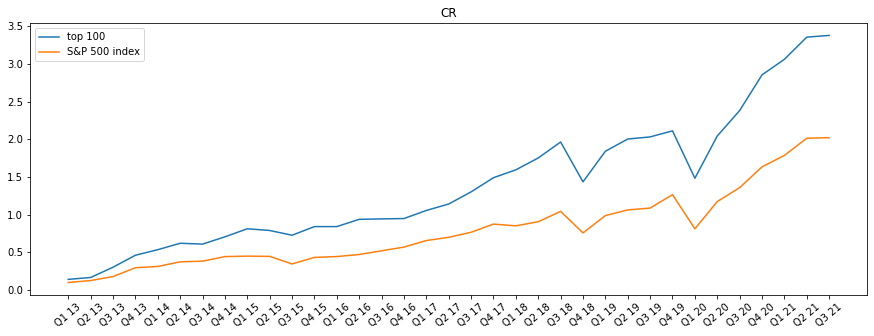

In [19]:
date_n = ['Q{} {}'.format(i%4+1, 13+int(i/4)) for i in range(35)]

plt.figure(figsize=(15,5))
plt.plot(date_n, crq_comp, crq_sp)
plt.xticks(rotation=40);
plt.title('CR');
plt.legend(['top 100', 'S&P 500 index']);

In [20]:
cr_sp = dfsp1.iloc[118,1]/dfsp1.iloc[13,1] - 1
cr_c = reduce(lambda x, y: x*y, compr1) - 1

period = (dfsp1.iloc[118,0]-dfsp1.iloc[13,0]).days/365

ry_sp = pow(dfsp1.iloc[118,1]/dfsp1.iloc[13,1], 1/period) - 1
ry_c = pow(reduce(lambda x, y: x*y, compr1), 1/period) - 1

vol_sp = pow(np.var(crq_sp), 1/2)
vol_c = pow(np.var(crq_comp), 1/2)

pd.DataFrame([[cr_sp, cr_c], [ry_sp, ry_c],[vol_sp, vol_c]],
             columns=['S&P500', 'TOP100'],
             index=['Доходность за весь период в абсолютных значениях',
                    'Доходность за весь период в годовых', 
                    'Волатильность'])

,S&P500,TOP100
Доходность за весь период в абсолютных значениях,2.020313,3.376471
Доходность за весь период в годовых,0.134597,0.183703
Волатильность,0.502761,0.864858


In [21]:
# Стоит отметить, что состав индекса S&P 500 менялся с течением времени, компании добавлялись и удалялись.
# При выполнении задания используются исторические данные индекса S&P 500 и исторические цены компаний, которые 
# входят в индекс сейчас, но ранее мы не могли знать, каким будет текущий состав индекса.

________________________